ORB (Oriented FAST and Rotated BRIEF)

Opening video file: ../videos/bedroomvideo.mp4


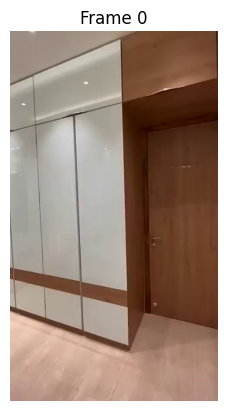

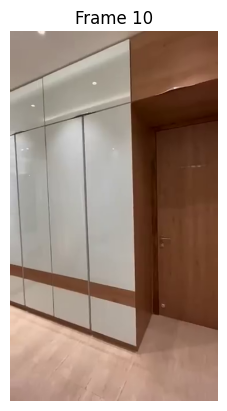

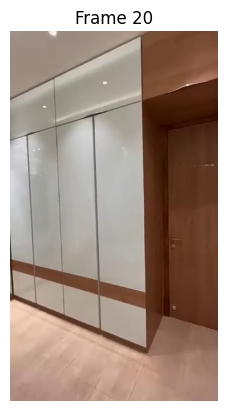

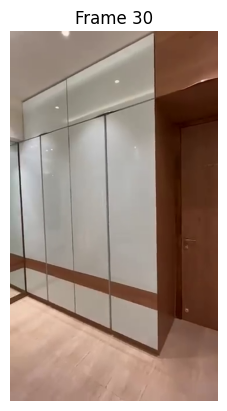

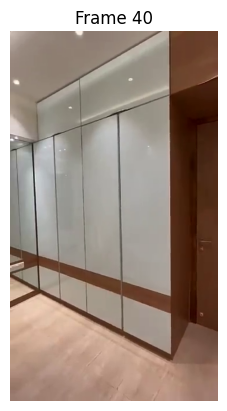

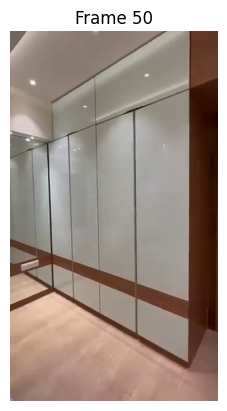

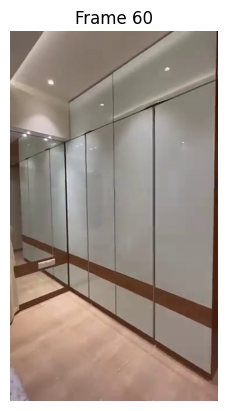

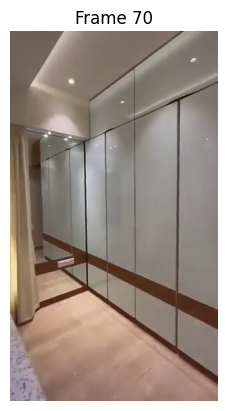

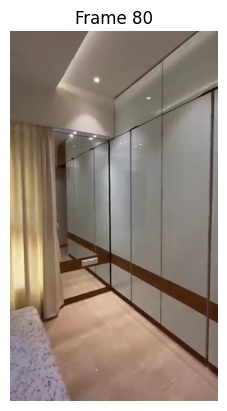

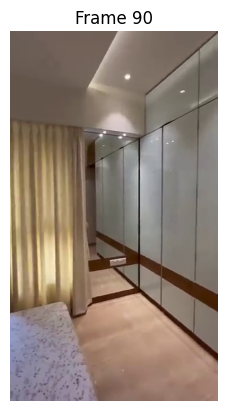

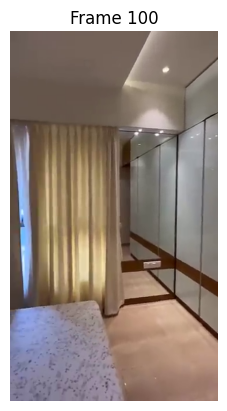

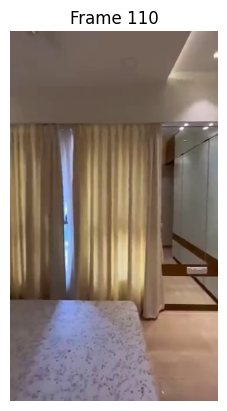

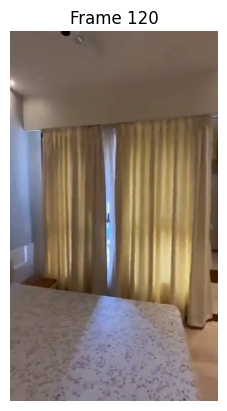

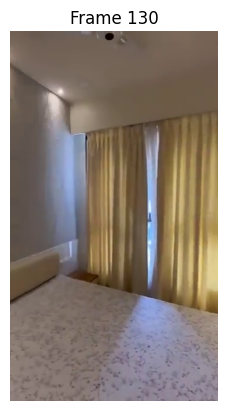

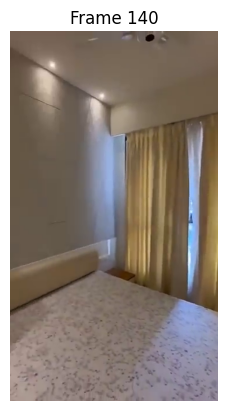

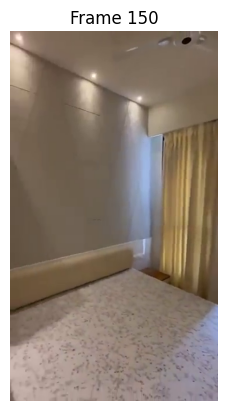

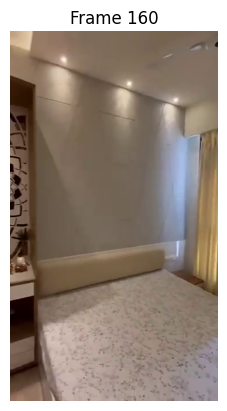

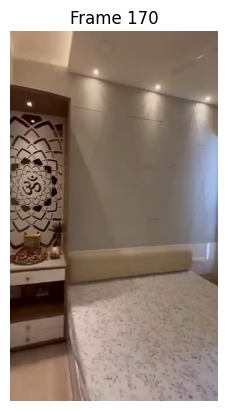

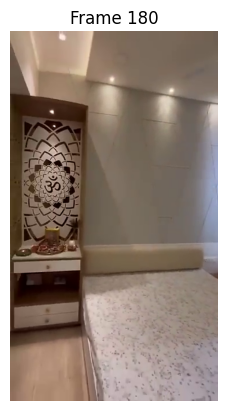

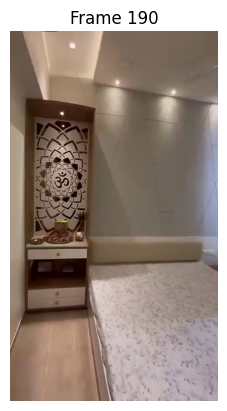

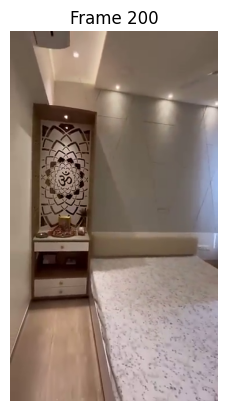

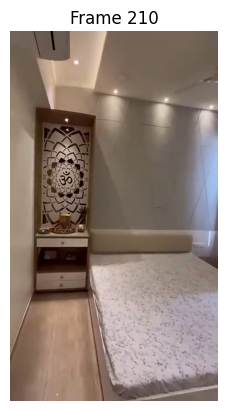

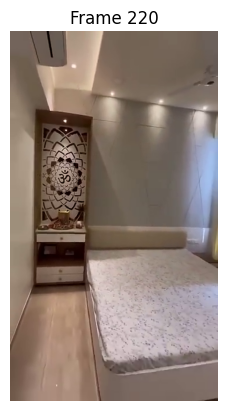

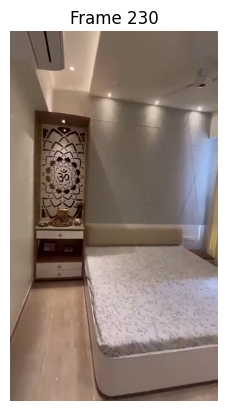


Finished processing video.
Total frames iterated: 237


In [1]:
import matplotlib.pyplot as plt
import imageio.v3 as iio

def load_video_frames(video_path, frame_interval=10, display_frames=True):
    # Load frames from a video file at specified intervals.

    frame_count = 0
    frames = []  # List to store frames for visualization

    try:
        print(f"Opening video file: {video_path}")
        
        # Iterate through frames in the video file
        for frame in iio.imiter(video_path):
            if frame_count % frame_interval == 0:
                frames.append(frame)  # Store frame in list
                
                # Display frame if display_frames is True
                if display_frames:
                    plt.imshow(frame)
                    plt.title(f'Frame {frame_count}')
                    plt.axis('off')
                    plt.show()
                
            frame_count += 1

    except FileNotFoundError:
        print(f"Error: Video file not found at {video_path}")
        return [], 0
    except Exception as e:
        print(f"An error occurred while processing the video: {e}")
        return [], 0

    print(f"\nFinished processing video.")
    print(f"Total frames iterated: {frame_count}")
    
    return frames

frames = load_video_frames('../videos/bedroomvideo.mp4', frame_interval=10, display_frames=True)

In [ ]:
import cv2

image = cv2.cvtColor(frames[2], cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create()

keypoints, descriptors = orb.detectAndCompute(image, None)
output = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)

cv2.imshow("ORB Features", output)
cv2.waitKey(0)
cv2.destroyAllWindows()